<a href="https://colab.research.google.com/github/mrinmoyeedeka/Mobile-price-range-prediction-Classification/blob/main/Classification_project_on_Mobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT NAME: Mobile Price Range Prediction**

# **PROJECT DESCRIPTION**

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is

# **DATASET DESCRIPTION**
Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels


Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),

###**GIT HUB LINK** : (https://github.com/mrinmoyeedeka/Mobile-price-range-prediction-Classification)

In [ ]:
# Importing all necessary libraries which we are going to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier  

#**Mounting the drive and Reading the dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset
df = pd.read_csv("/content/data_mobile_price_range.csv")

#  **Exploring the data set**
#####Lets explore our dataset.

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
len(df.columns)

21

In [ ]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
# viewing the size of the dataset
df.shape

(2000, 21)

We have 2000 samples and 21 attributes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# Checking for null values in the dataset
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no null values in the data set

In [ ]:
# Checking for categoriacal values
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
df.describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


#####From the above description, we can see the minnimum value for columns 'sc_w'(screen width) and 'px_height' is 0, which is not possible in real life. So we need need to handle these discrepencies in data and will have to replace these values.



In [ ]:
# Total phones with sc_w = 0
print(len(df[df.sc_w == 0]))

# Total phones with px_height = 0
print(len(df[df.px_height == 0]))


180
2


In [ ]:
# Assigning mean values where there is sc_W and px_height = zero
df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()

<ipython-input-14-060f3497b2be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
<ipython-input-14-060f3497b2be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()


# **Price range**

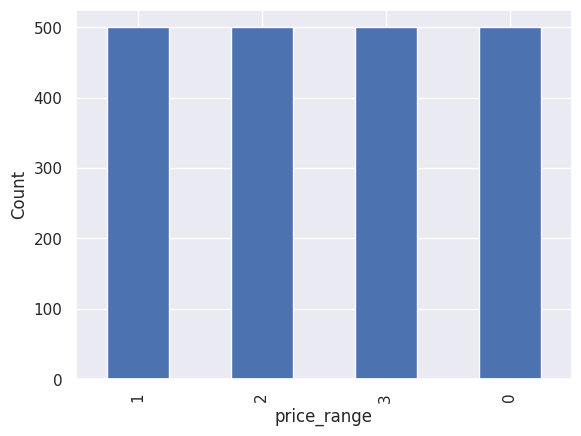

In [ ]:
#classes
sns.set()
price_plot=df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

**there are mobile phones in 4 price ranges. The number of elements is almost similar.**

# **Battery Power**

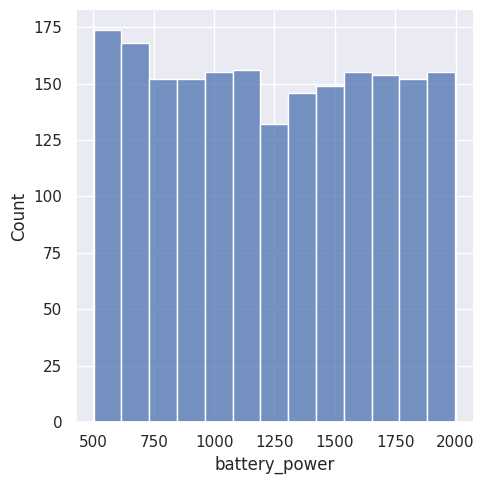

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(df["battery_power"])
plt.show()

**this plot shows how the battery mAh is spread. there is a gradual increase as the price range increases**

# **Bluetooth**

<Axes: xlabel='blue', ylabel='price_range'>

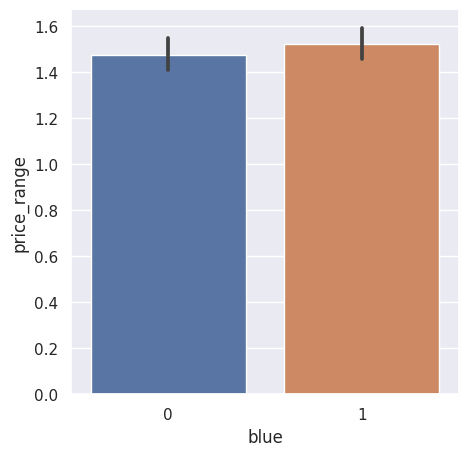

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(5,5))
sns.barplot(data=df,x='blue',y='price_range',ax=ax)   

**half the devices have Bluetooth, and half don’t.**

# **RAM**

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


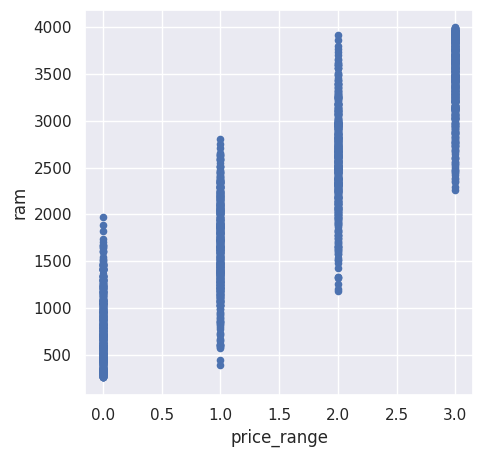

In [ ]:
df.plot(x='price_range',y='ram',kind='scatter')
plt.show()

**Ram has continuous increase with price range while moving from Low cost to Very high cost**



# **Pixel width and height**

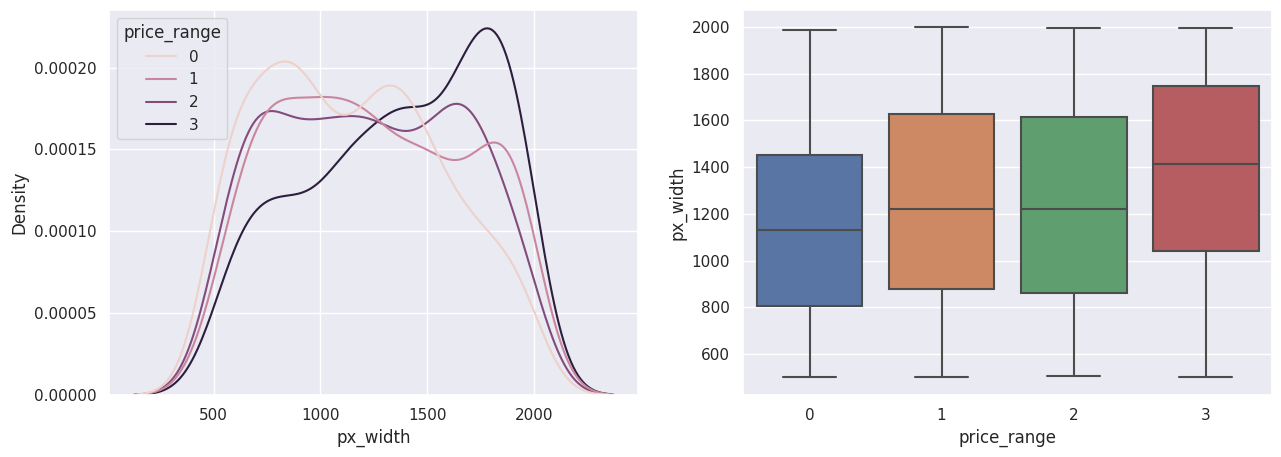

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_width', ax=axs[1])
plt.show()

**There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. so we can say that it would be a driving factor in deciding price_range.**

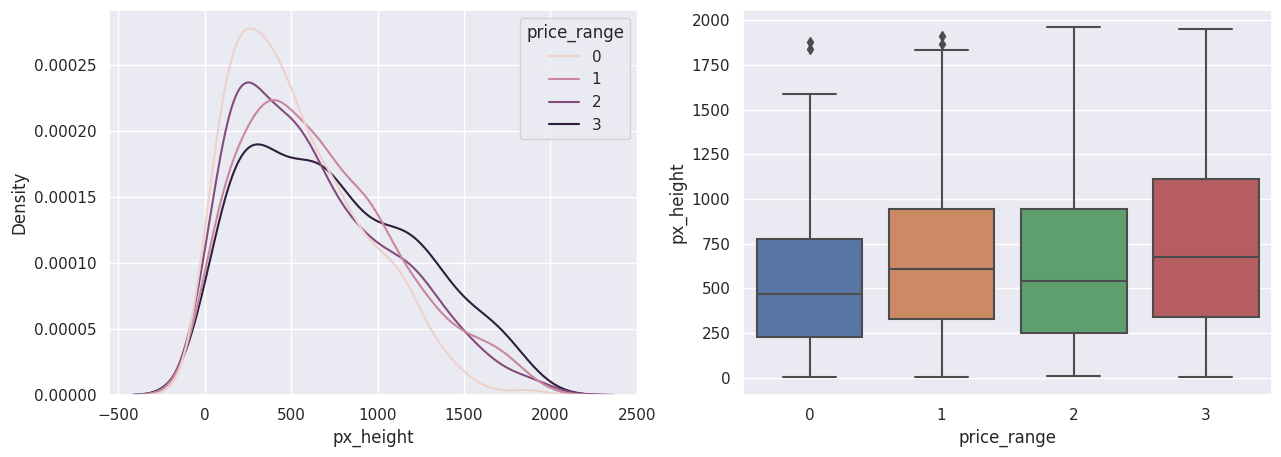

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_height', ax=axs[1])
plt.show()

**Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height**

# **Front Camera**

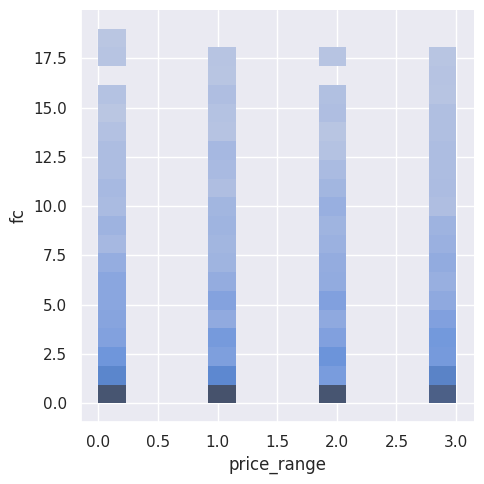

In [ ]:
sns.displot(data=  df, x='price_range',y='fc',kind='hist')
plt.show()

**This features distribution is almost similar along all the price ranges variable, it may not be helpful in making prediction**s

# **PC (Primary camera Megapixels)**

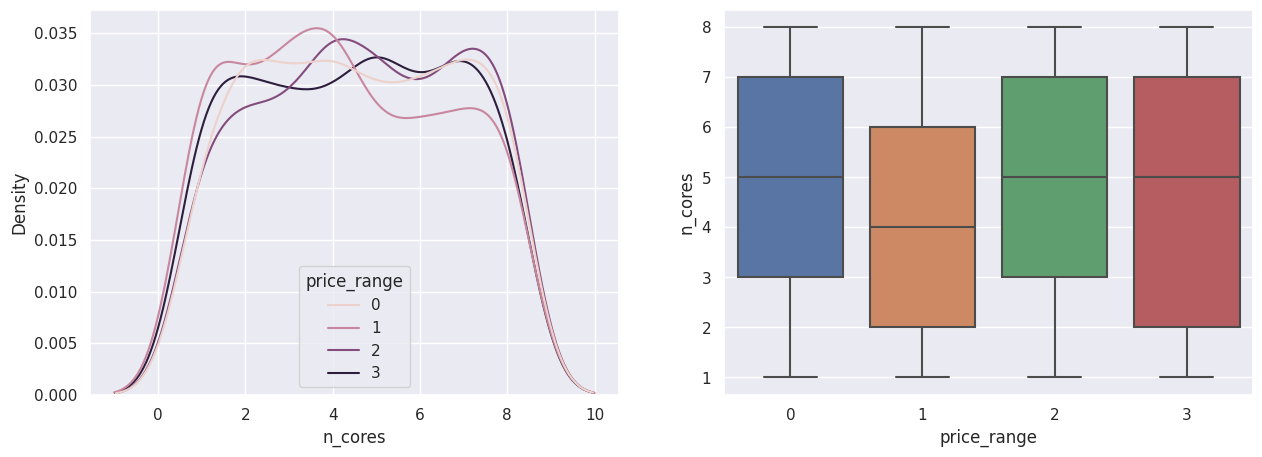

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='n_cores', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='n_cores', ax=axs[1])
plt.show()

**Primary camera megapixels are showing a little variation along the target categories, which is a good sign for prediction.**



# **mobile weight**



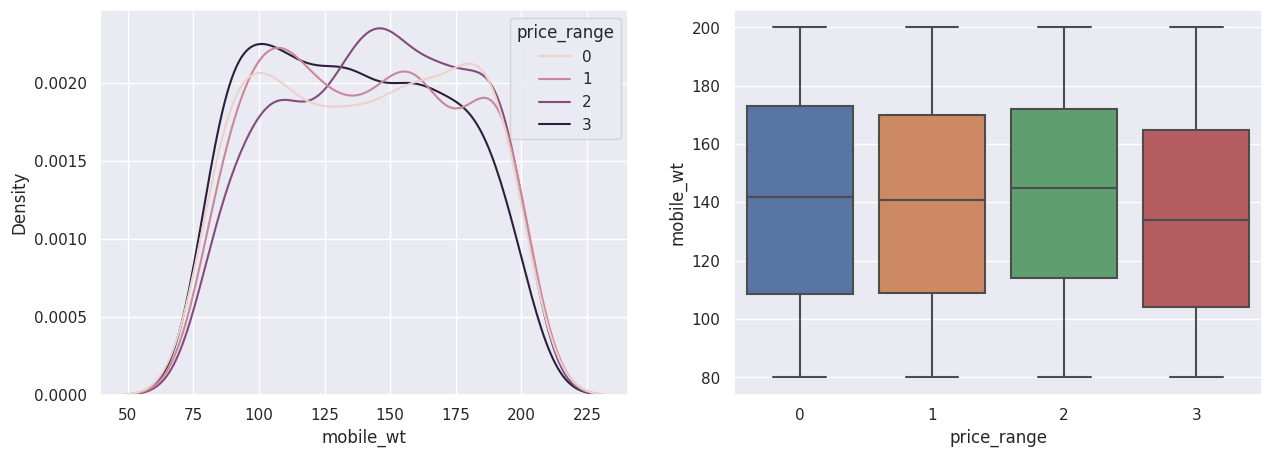

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()    

**costly phones are lighter as compared to normal one.**

# **Four-g and Three-g**

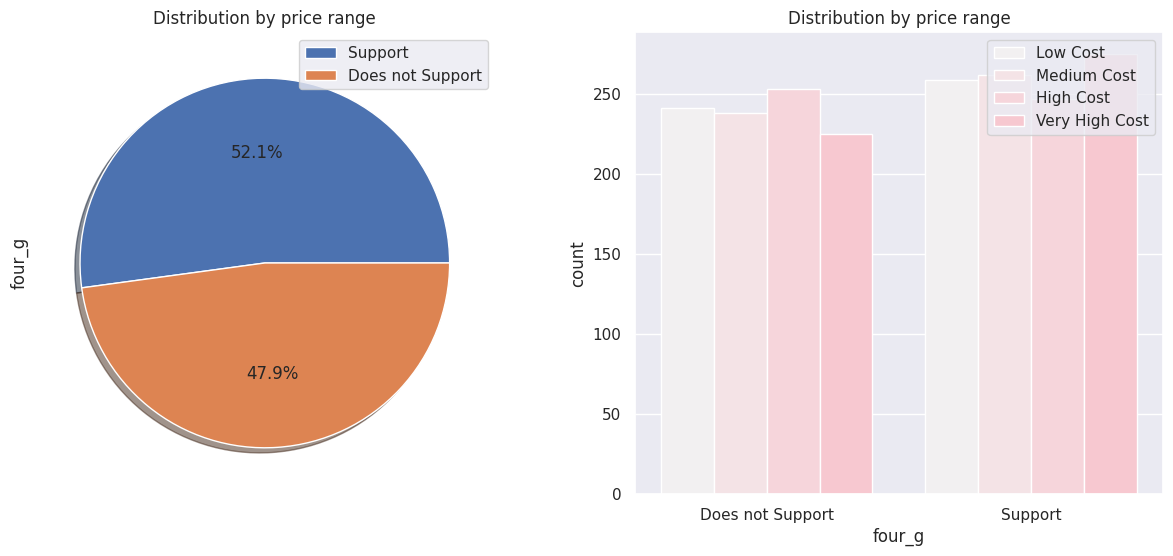

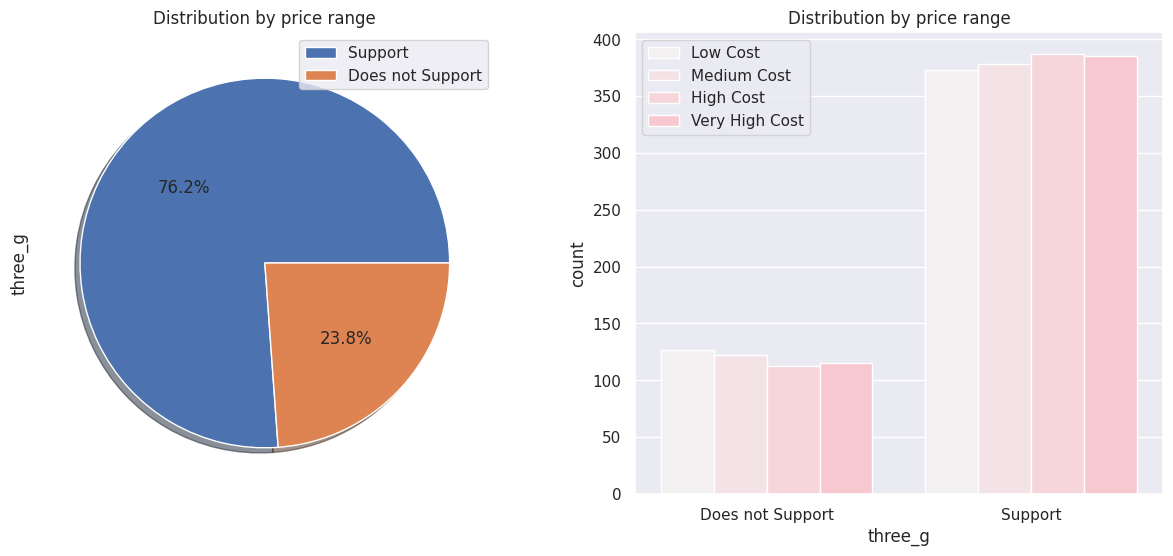

In [ ]:
binary_features = [ 'four_g', 'three_g']

# Plot of binary features against price range

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = df, ax = ax2, color = 'pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])
     


**feature 'three_g' play an important feature in prediction**


<Axes: >

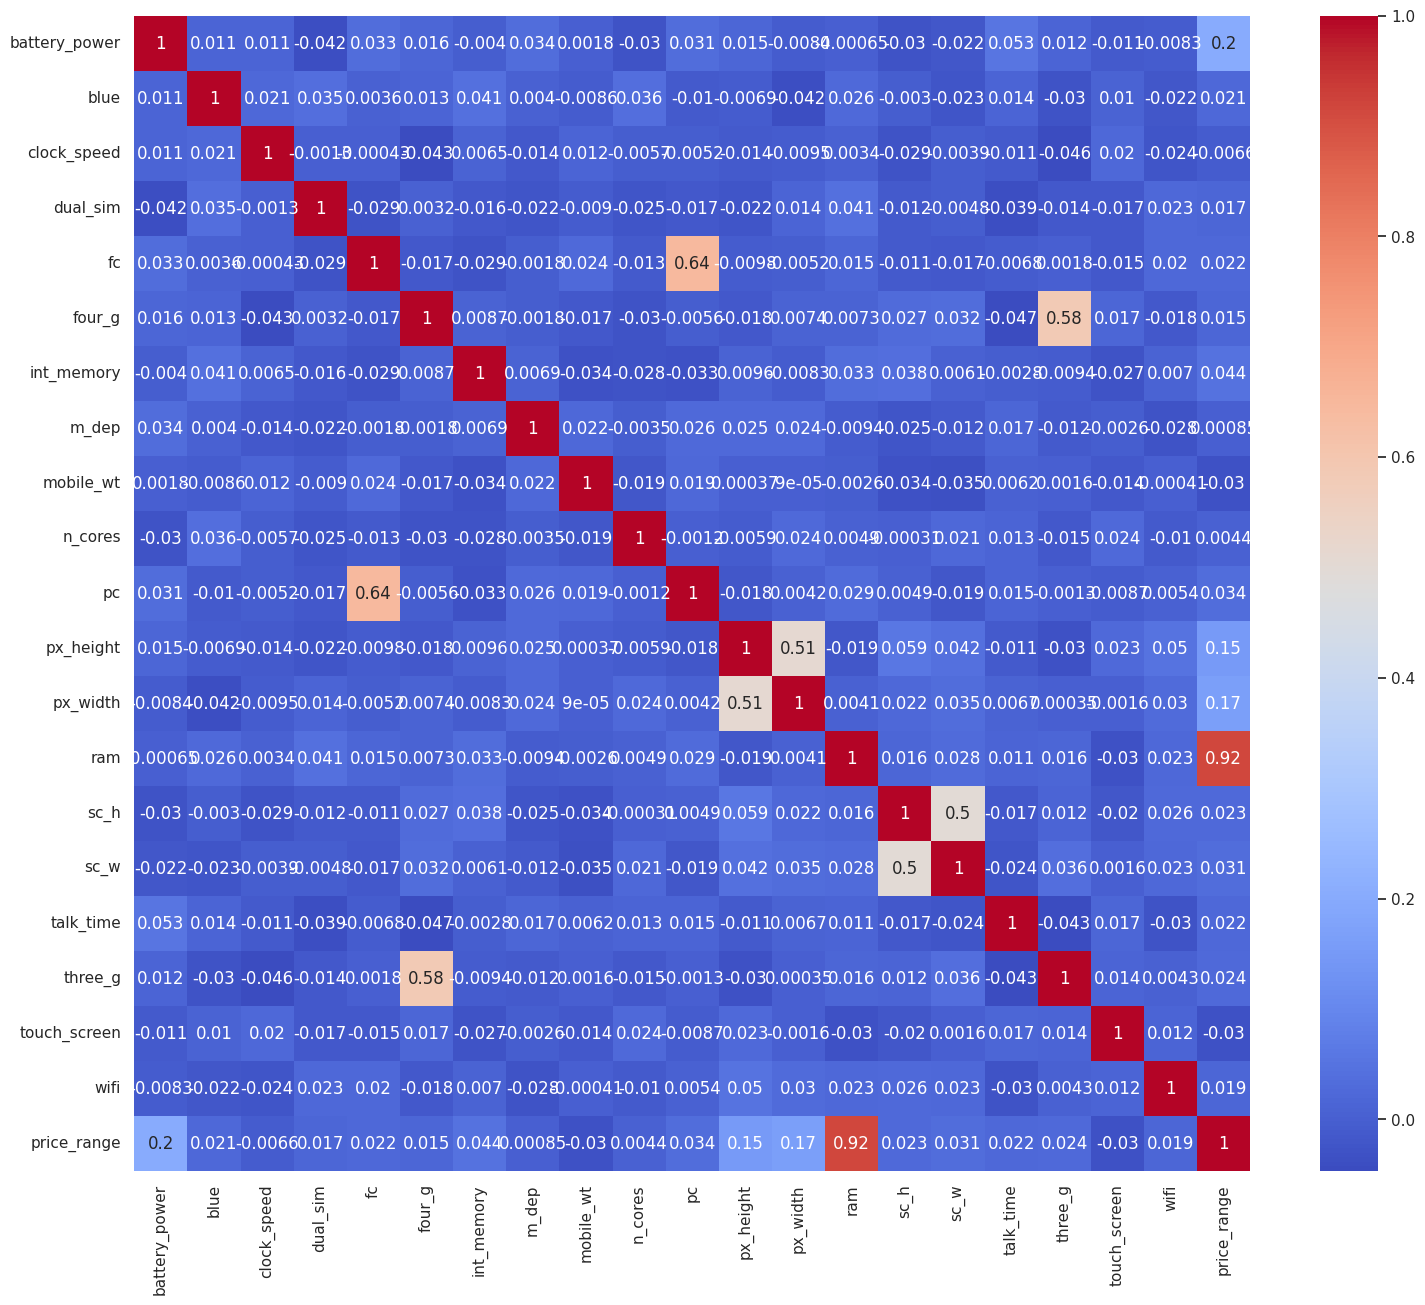

In [ ]:
correlation = df.corr()
plt.figure(figsize = [18, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

**RAM and price_range shows high correlation which is a good sign, it signifies that RAM will play major deciding factor in estimating the price range.**

**There is some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.**

**Also, if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature. Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.**

**the most influential variable is ram**

**most of the variables have very little correlation to price range**

**primary camera mega pixels and front Camera mega pixels have correlation (it make sense because both of them reflect technology level of resolution of the related phone model) but they do not effect prige range.**

**having 3G and 4G is somewhat correlated**

**there is no highly correlated inputs in our dataset, so there is no multicollinearity problem.**

Lets define X and y

In [ ]:
X = df.drop (['price_range'], axis = 1)
y= df['price_range']

In [ ]:
X.shape

(2000, 20)

In [ ]:
y.shape

(2000,)

In [ ]:
# Scaling values of X

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

In [ ]:
X_train.shape

(1600, 20)

In [ ]:
y_train.shape

(1600,)

# **IMPLEMENTATION OF MACHINE LEARNING ALGORITHM**

#DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [ ]:
y_pred_test = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

In [ ]:
accuracy_score(y_test, y_pred_test)

0.8225

In [ ]:
# Evaluation metrics for test

print('Classification report for Decision Tree (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        99
           1       0.84      0.73      0.78       104
           2       0.70      0.77      0.73        83
           3       0.88      0.87      0.88       114

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



In [ ]:
# Cross validation

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dt, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.800 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.819 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.803 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.772 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.794 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [ ]:
# Prediction

y_pred_test = grid.predict(X_test)
y_pres_train = grid.predict(X_train)
# Evaluation metrics for test

print('Classification Report for Decision Tree (Test set)= ')
print(classification_report(y_test, y_pred_test))

Classification Report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       105
           1       0.74      0.82      0.78        91
           2       0.73      0.68      0.71        92
           3       0.86      0.88      0.87       112

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



[[92 13  0  0]
 [ 6 75 10  0]
 [ 0 13 63 16]
 [ 0  0 13 99]]


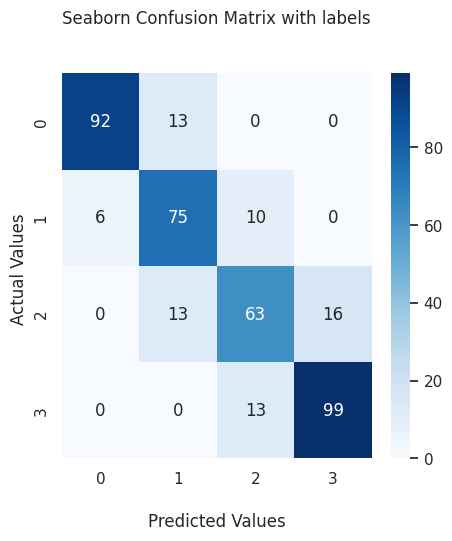

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()
     

#Random forest classifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, random_state=101, criterion = 'entropy', oob_score = True) 
model_rf = rf.fit(X_train, y_train)

In [ ]:
y_pred_test = rf.predict(X_test) 
y_pred_train = rf.predict(X_train)

In [ ]:
y_pred = rf.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score

0.8875

In [ ]:
y_pred_train = rf.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.85      0.85      0.85        91
           2       0.80      0.84      0.82        92
           3       0.94      0.90      0.92       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



[[100   5   0   0]
 [  6  77   8   0]
 [  0   9  77   6]
 [  0   0  11 101]]


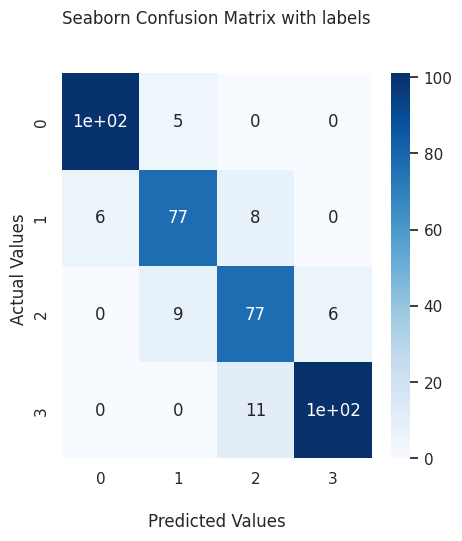

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

# K- NearestNeighbour (KNN)

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3)  
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = model_knn.predict(X_train)  

In [ ]:
print(metrics.confusion_matrix(y_train, y_pred_knn)) 

[[325  46  21   3]
 [117 253  30   9]
 [ 76  87 214  31]
 [ 19  69  55 245]]


In [ ]:
print(accuracy_score(y_train, y_pred_knn)) 

0.648125


In [ ]:
##In the first try, we did not know the optimum 'k'.
##Let's find the optimum 'k' value via Grid Search method and run knn model with this 'k'.


from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 19}

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=19)  
model_knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=19)

In [ ]:
y_pred_knn = model_knn.predict(X_train) 

In [ ]:
acc_knn = accuracy_score(y_train, y_pred_knn)
acc_knn

0.579375

# XG - Boost

In [ ]:
# Applying XGBoost
xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')

# Prediction

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       105
           1       0.86      0.95      0.90        91
           2       0.88      0.85      0.86        92
           3       0.94      0.91      0.93       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



In [ ]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= ')
print(score)

Classification Report for XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
# Cross validation

grid = GridSearchCV(xgb, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 10)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.869 total time=   0.1s
[CV 2/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.869 total time=   0.1s
[CV 3/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 3/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.847 total time=   0.1s
[CV 4/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 4/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.828 total time=   0.1s
[CV 5/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': (5, 10), 'n_estimators': (10, 200),
                         'subsample': [0.3, 0.5, 0.8]},
             scoring='accuracy', verbose=10)

In [ ]:
# Prediction

y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for tuned XGBoost(Test set)= ')
print(score)

Classification Report for tuned XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.89      0.92      0.91        91
           2       0.87      0.86      0.86        92
           3       0.94      0.92      0.93       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



[[101   4   0   0]
 [  4  84   3   0]
 [  0   6  79   7]
 [  0   0   9 103]]


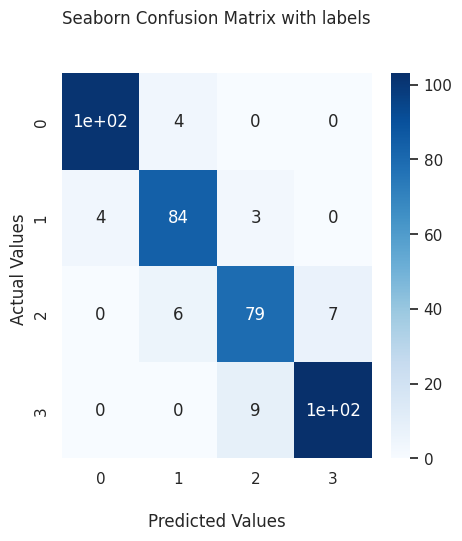

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       395
           1       0.97      0.98      0.97       409
           2       0.98      0.98      0.98       408
           3       1.00      0.99      0.99       388

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



# **Conclusion**

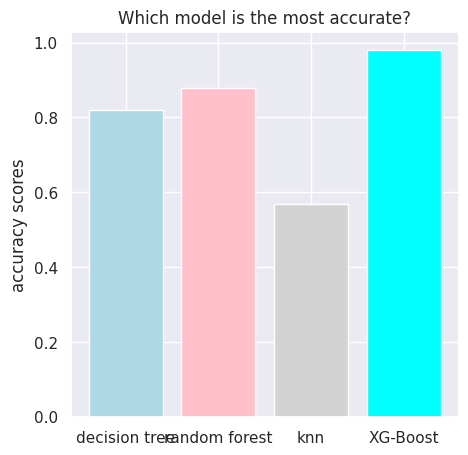

In [ ]:
models = ['decision tree', 'random forest', 'knn', 'XG-Boost']
acc_scores = [0.82, 0.88, 0.57, 0.98]

plt.bar(models, acc_scores, color=['lightblue', 'pink', 'lightgrey', 'cyan'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()



*   There are total number of four types of price range in mobile phones and all elements are almost same.
*   Half of the mobile phone categories has bluetooth and half dont.

*   As the battery power increases the price of the mobile also increases gradually.

*   Ram has continuous increase with price range while moving from Low cost to Very high cost

*   RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.
*   When the cost of the phone is high the price of the mobile phone is also high.



*   In ML the most inaccurate model we have seen is KNN which gave an accuracy of 57%


*   Both decision tree and random forest gave almost same accuracy of 82% and 88%.

*   XG-Boost gave us the most accurate result in terms of accuracy of 98% and this model ca be used for price range analysis.




